In [2]:
# for data processing and manipulation
import pandas as pd
import numpy as np

# scikit-learn modules for feature selection and model evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# libraries for visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Read train data

In [14]:
## print out the first 5 rows of each dataset
holidays0 = pd.read_csv("./data/holidays_events.csv")
oil0 = pd.read_csv("./data/oil.csv")
stores0 = pd.read_csv("./data/stores.csv")
train0 = pd.read_csv("./data/train.csv")
transactions0 = pd.read_csv("./data/transactions.csv")
test0 = pd.read_csv("./data/test.csv")



In [19]:
oil0

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [4]:
train0.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [5]:
holidays0.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [6]:
oil0.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [12]:
train0.groupby(['date', 'store_nbr']).sales.sum().reset_index()

,date,store_nbr,sales
0,2013-01-01,1,0.000000
1,2013-01-01,2,0.000000
2,2013-01-01,3,0.000000
3,2013-01-01,4,0.000000
4,2013-01-01,5,0.000000
...,...,...,...
90931,2017-08-15,50,16879.121004
90932,2017-08-15,51,20154.559000
90933,2017-08-15,52,18600.046000
90934,2017-08-15,53,8208.189000


In [13]:
pd.merge(transactions0, train0.groupby(['date', 'store_nbr']).sales.sum().reset_index(), how='left', on=['date', 'store_nbr'])

,date,store_nbr,transactions,sales
0,2013-01-01,25,770,2511.618999
1,2013-01-02,1,2111,7417.148000
2,2013-01-02,2,2358,10266.718981
3,2013-01-02,3,3487,24060.348000
4,2013-01-02,4,1922,10200.083980
...,...,...,...,...
83483,2017-08-15,50,2804,16879.121004
83484,2017-08-15,51,1573,20154.559000
83485,2017-08-15,52,2255,18600.046000
83486,2017-08-15,53,932,8208.189000


In [8]:
transactions0.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [7]:
# merge dataframes to train on date column

train = pd.merge(train0, holidays0, how='left', on=['date'], suffixes=['', 'holiday'])
train = pd.merge(train, oil0, how='left', on=['date'])
train = pd.merge(train, stores0, how='left', on=['store_nbr'], suffixes=['_holiday', '_store'])
train = pd.merge(train, transactions0, how='left', on=['date', 'store_nbr'])


In [35]:
store_comparison
# one hot encoding for categorical variables
store_comparison_dummies = pd.get_dummies(store_comparison, columns=['type', 'cluster', 'state'], drop_first=True)

In [45]:
store_comparison = train0.groupby(['store_nbr'])['sales', 'onpromotion'].sum().reset_index().merge(stores0, how='left', on='store_nbr')
# one hot encoding for categorical variables
# store_comparison_dummies = pd.get_dummies(store_comparison, columns=['type', 'cluster', 'state'], drop_first=True)
## calculate correlation of specific combinations
store_comparison_corr = store_comparison_dummies.corr()

# draw a heatmap to visualize the correlation with big image size
import matplotlib.pyplot as plt

# fig,ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches

# sns.heatmap(store_comparison_corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.2, ax=ax)

C:\Users\Juan\AppData\Local\Temp\ipykernel_14816\4234949466.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store_comparison = train0.groupby(['store_nbr'])['sales', 'onpromotion'].sum().reset_index().merge(stores0, how='left', on='store_nbr')
C:\Users\Juan\AppData\Local\Temp\ipykernel_14816\4234949466.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  store_comparison_corr = store_comparison_dummies.corr()


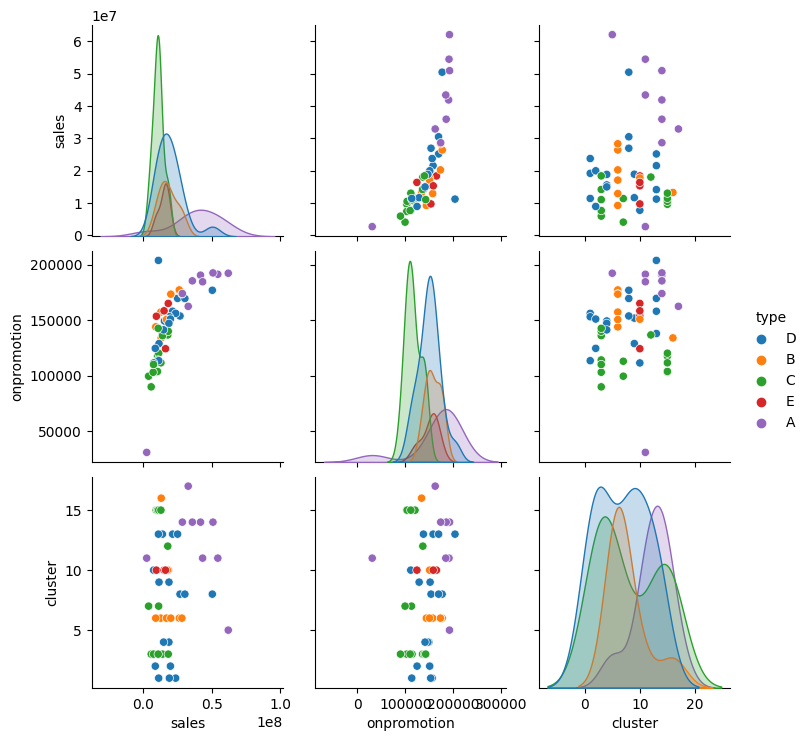

In [49]:
sns.pairplot(store_comparison.drop('store_nbr', axis=1), hue='type')

<Axes: xlabel='date', ylabel='sales'>

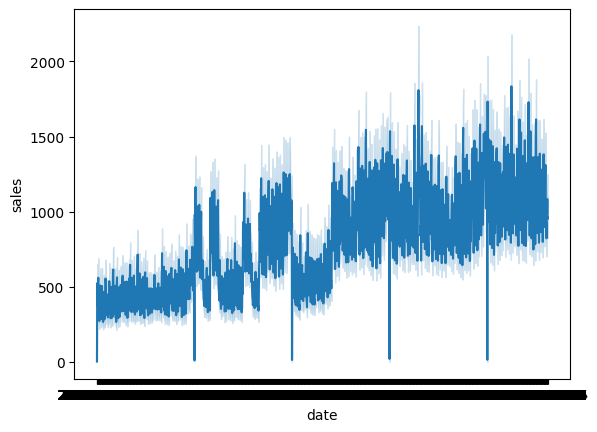

In [135]:
# keep every other date groupbed by each store
sns.lineplot(train0.groupby(['store_nbr']).apply(lambda x: x.iloc[::3, :]).reset_index(drop=True), y='sales', x='date') 

<Axes: xlabel='date', ylabel='sales'>

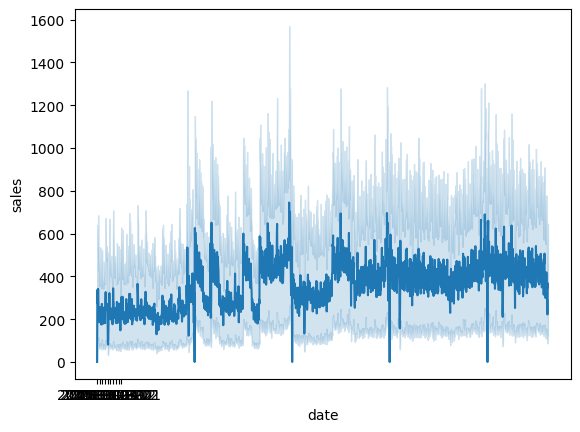

In [139]:
# keep every other date groupbed by each store
plt.xticks(np.arange(0, 100, 10))
sns.lineplot(train0[train0['store_nbr']==train0['store_nbr'].sample(1).iloc[0]], y='sales', x='date') 

<Axes: xlabel='date', ylabel='sales'>

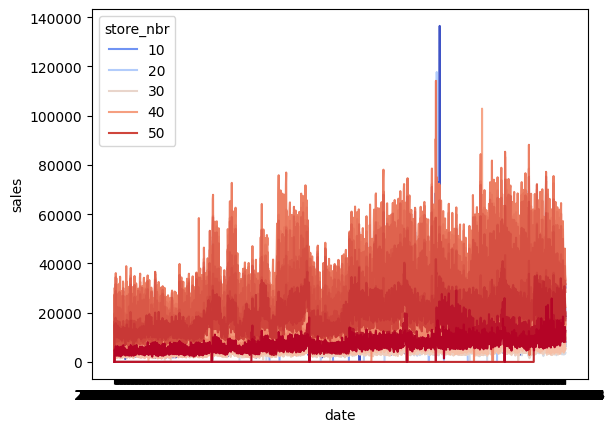

In [53]:
sns.lineplot(train0.groupby(['store_nbr', 'date']).sales.sum().reset_index(), x='date', y='sales', hue='store_nbr', palette='coolwarm')

In [62]:
# families with no sales per store_nbr
sales_per_family = train0.groupby(['store_nbr', 'family']).sales.sum().reset_index()
sales_per_family[sales_per_family['sales'] == 0]

,store_nbr,family,sales
1,1,BABY CARE,0.0
268,9,BOOKS,0.0
301,10,BOOKS,0.0
334,11,BOOKS,0.0
367,12,BOOKS,0.0
397,13,BABY CARE,0.0
400,13,BOOKS,0.0
433,14,BOOKS,0.0
449,14,LAWN AND GARDEN,0.0
466,15,BOOKS,0.0


<Axes: xlabel='date', ylabel='sales'>

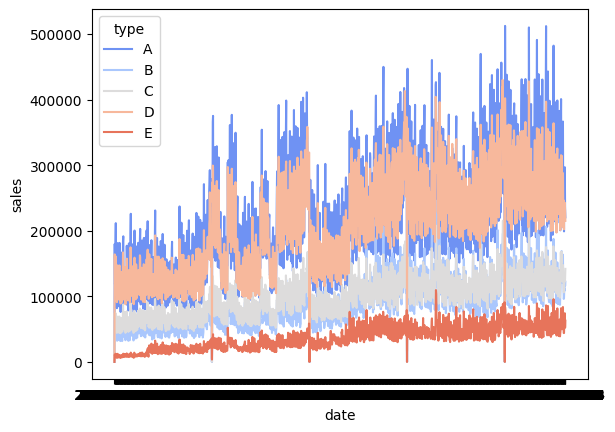

In [55]:
sns.lineplot(train0.merge(stores0, on='store_nbr').groupby(['type', 'date']).sales.sum().reset_index(), x='date', y='sales', hue='type', palette='coolwarm')

In [9]:
# # standard scale numerical features
# scaler = StandardScaler()
# train[['transactions', 'sales', 'dcoilwtico']] = scaler.fit_transform(train[['transactions', 'sales', 'dcoilwtico']])

<Axes: xlabel='date', ylabel='sales'>

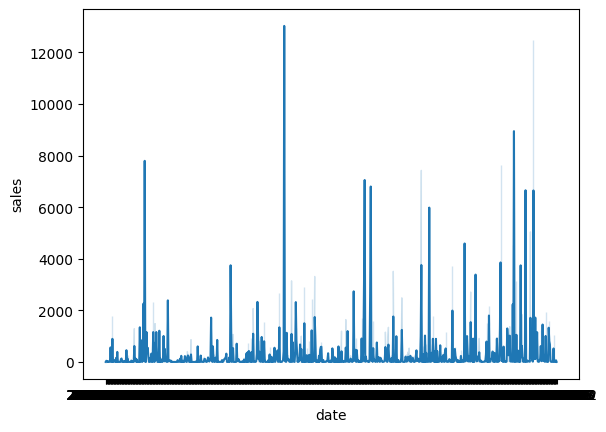

In [23]:
sns.lineplot(train0.sample(1000).groupby(['date', 'store_nbr']).sales.sum().reset_index(), x="date", y="sales")

<Axes: xlabel='date', ylabel='transactions'>

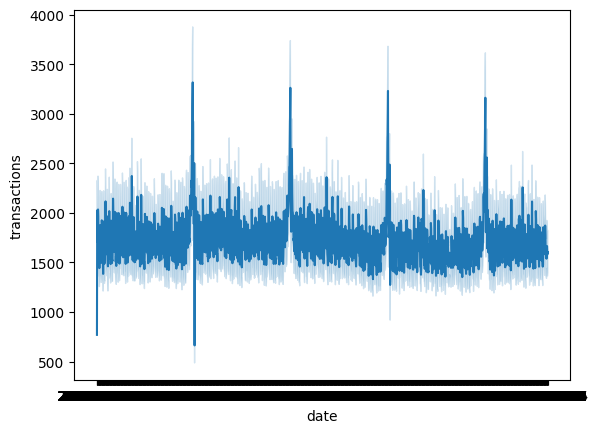

In [37]:
sns.lineplot(transactions0, x="date", y="transactions")

# OIL vs Sales

In [89]:
# standardize features and fit transform keeping column names
scaler = StandardScaler()
oil_sales_relationship = scaler.fit_transform(train0.merge(oil0, how='left', on=['date'])[['sales', 'dcoilwtico']])

In [90]:
oil_sales_relationship = pd.DataFrame(oil_sales_relationship, columns=['sales', 'dcoilwtico'])
oil_sales_relationship['store_nbr'] = train0['store_nbr']


<Axes: xlabel='sales', ylabel='dcoilwtico'>

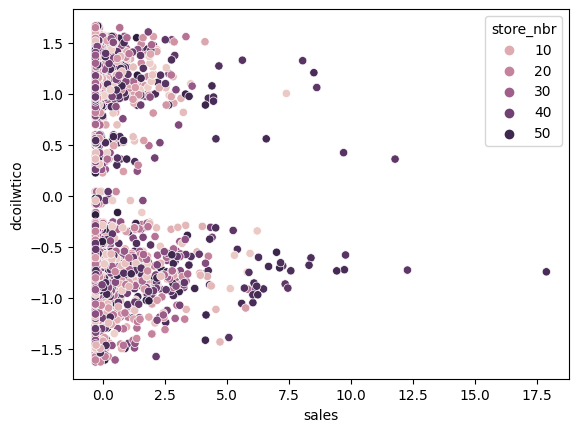

In [97]:
# scatterplot with hue for store_nbr
sns.scatterplot(oil_sales_relationship.sample(10000), x='sales', y='dcoilwtico', hue='store_nbr')

In [99]:
train0.merge(oil0, how='left', on=['date'])[['sales', 'dcoilwtico']].corr()

,sales,dcoilwtico
sales,1.00000,-0.07905
dcoilwtico,-0.07905,1.00000


lower oil prices seem to be driving more sales

# average sales of product families

<Axes: xlabel='sales', ylabel='family'>

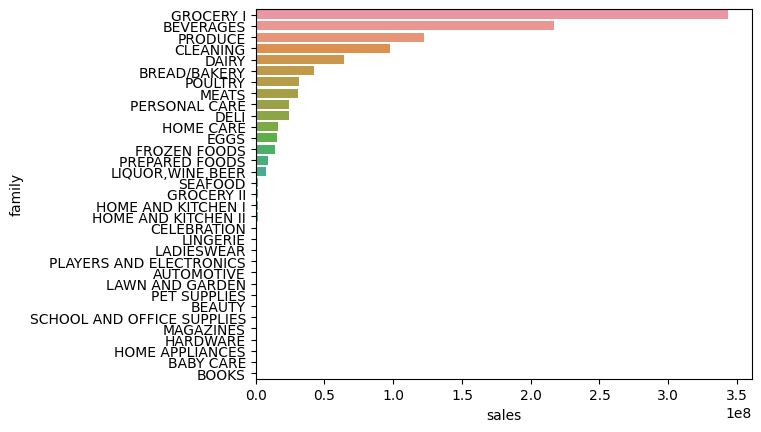

In [118]:
# draw a barchart with information on sales per family
# align labels so they are readable
sns.barplot(train0.groupby(['family']).sales.sum().reset_index().sort_values('sales', ascending=False), y='family', x='sales')


<Axes: xlabel='sales', ylabel='onpromotion'>

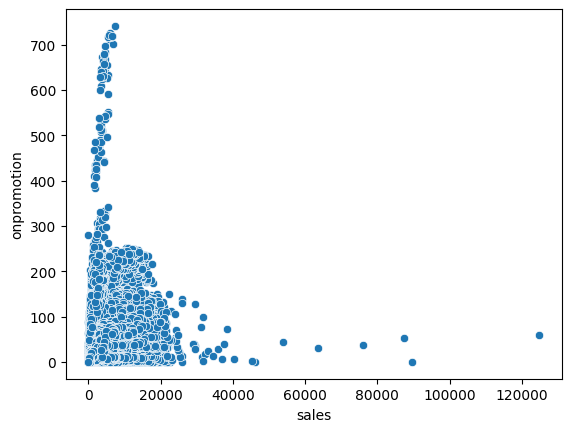

In [128]:
sns.scatterplot(train0, x='sales', y='onpromotion')

In [10]:
# convert boolean values to float. to permit plotting
train['transferred'] = train['transferred'].astype(float)

In [25]:
# plot reduced amount of observations
sns.pairplot(train[['date', 'family', 'transferred', 'onpromotion', 'transactions', 'sales', 'dcoilwtico', 'city', 'state', 'type_store', 'cluster']].sample(10000))

NameError: name 'train' is not defined

In [31]:
#countplot of family variable
# sns.countplot(x="family", data=train)

# bar chart of family variable. x axis is date

TypeError: Neither the `x` nor `y` variable appears to be numeric.

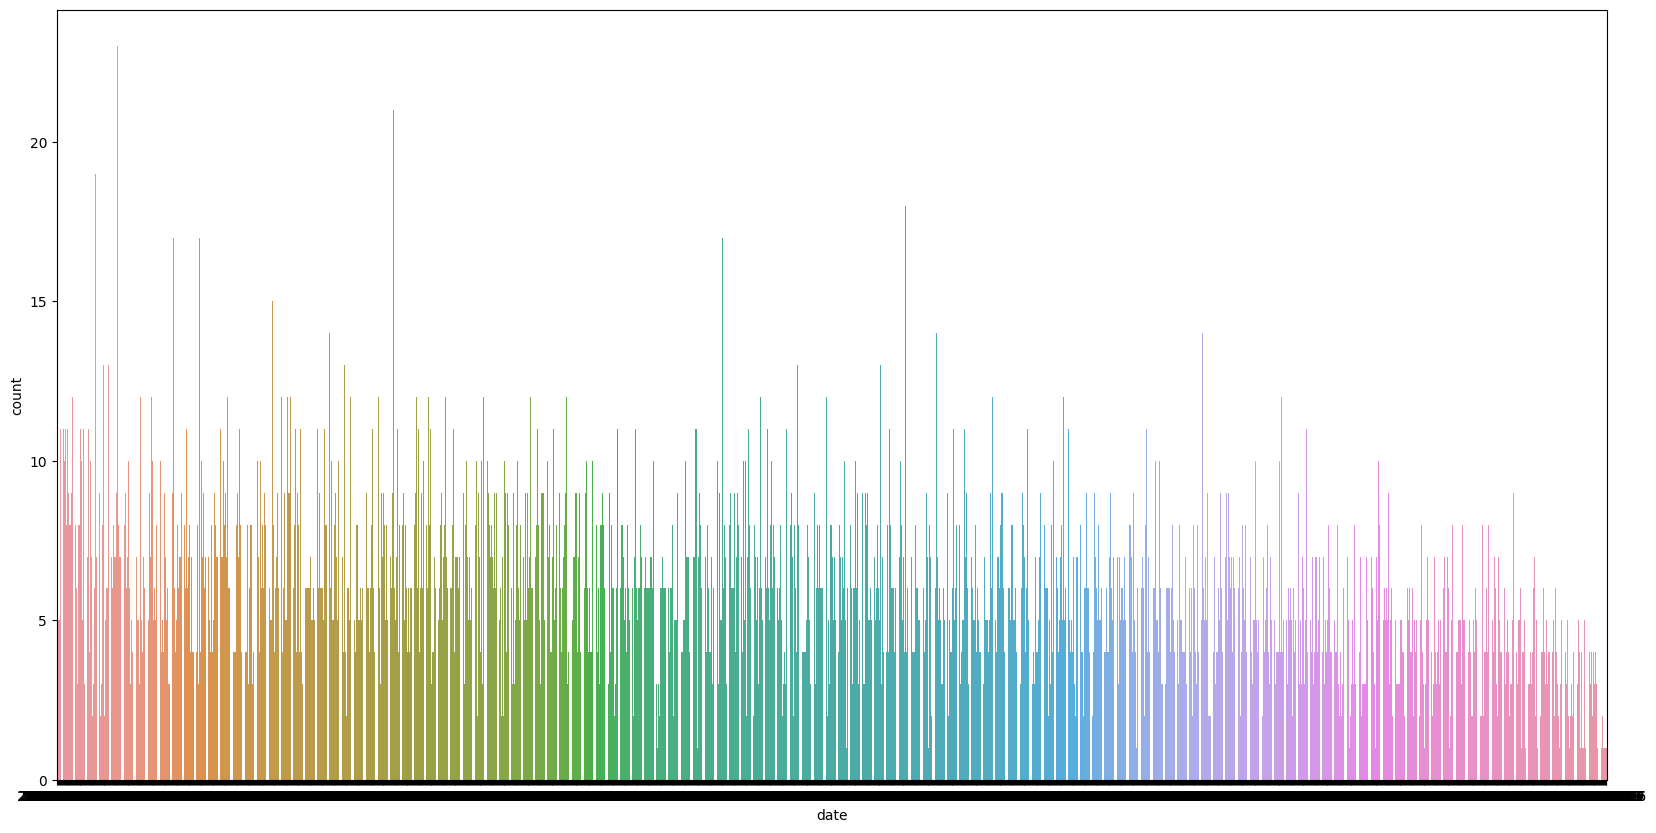

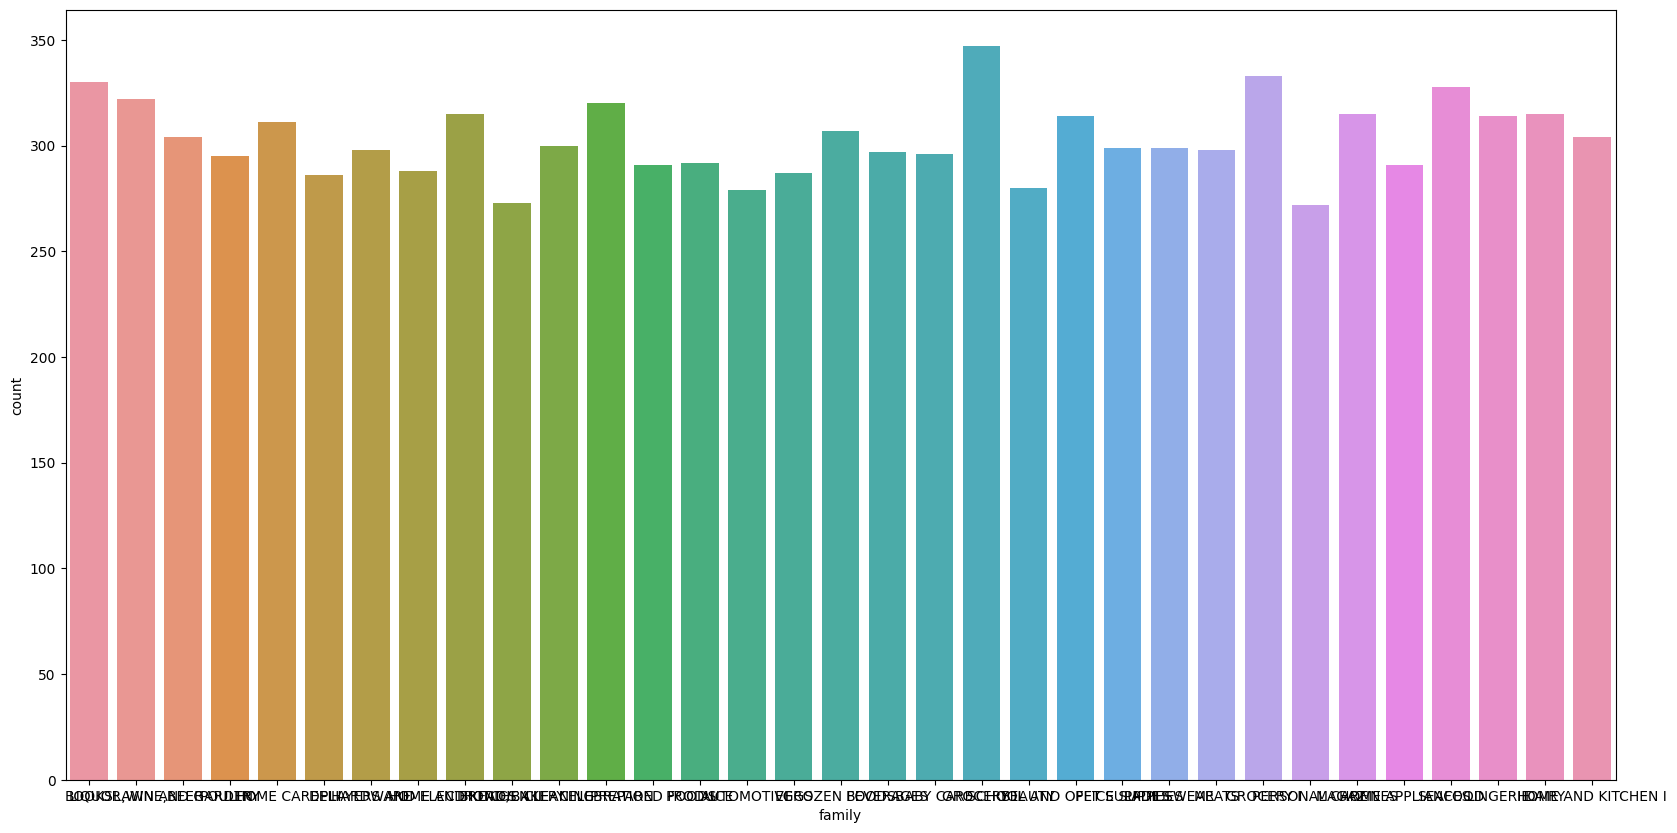

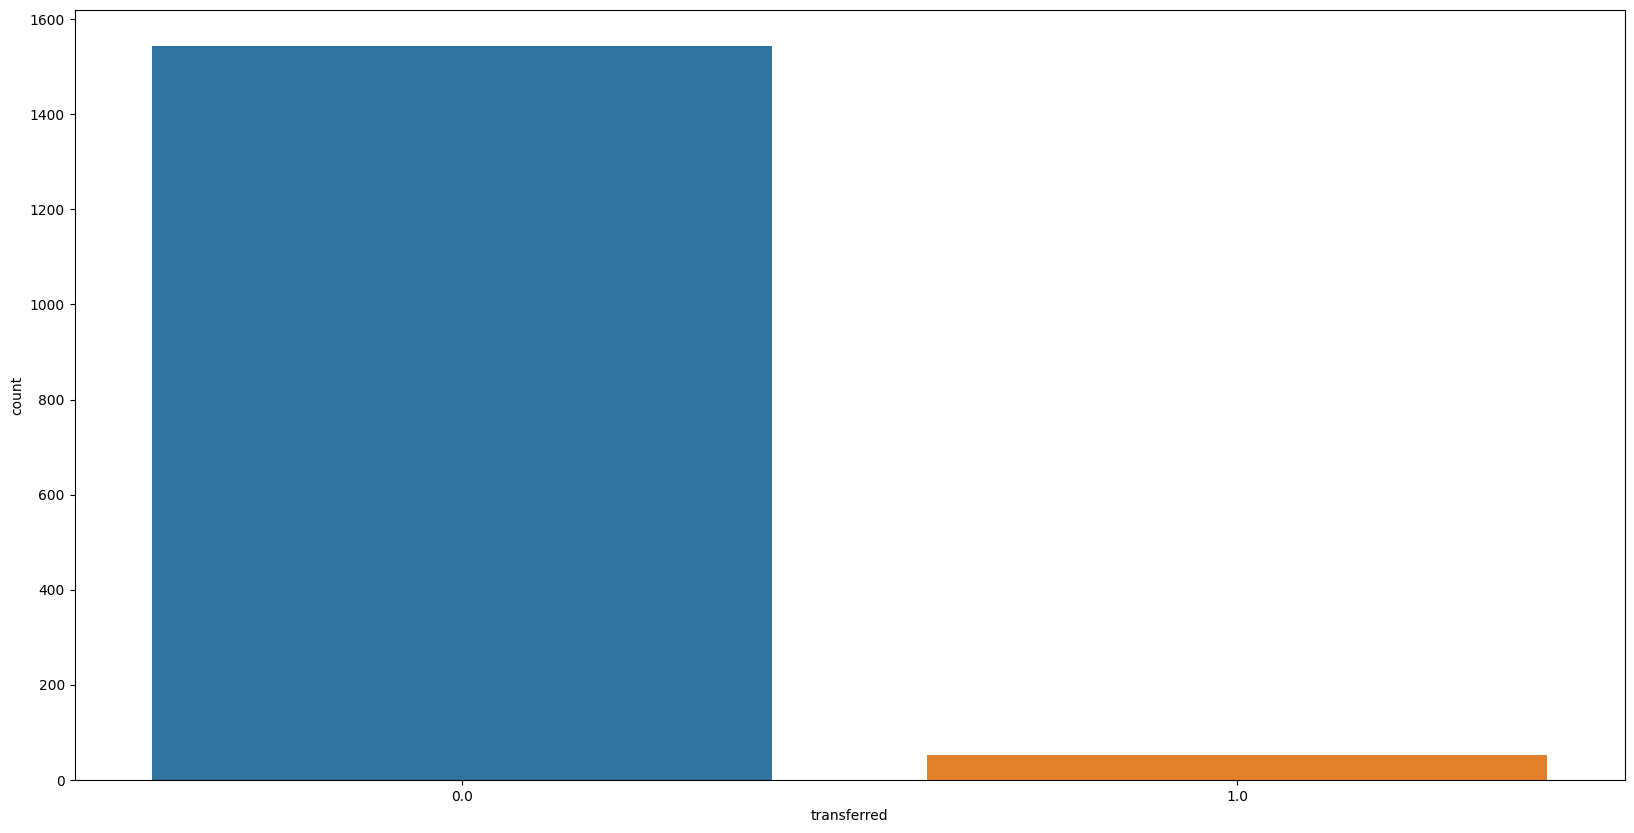

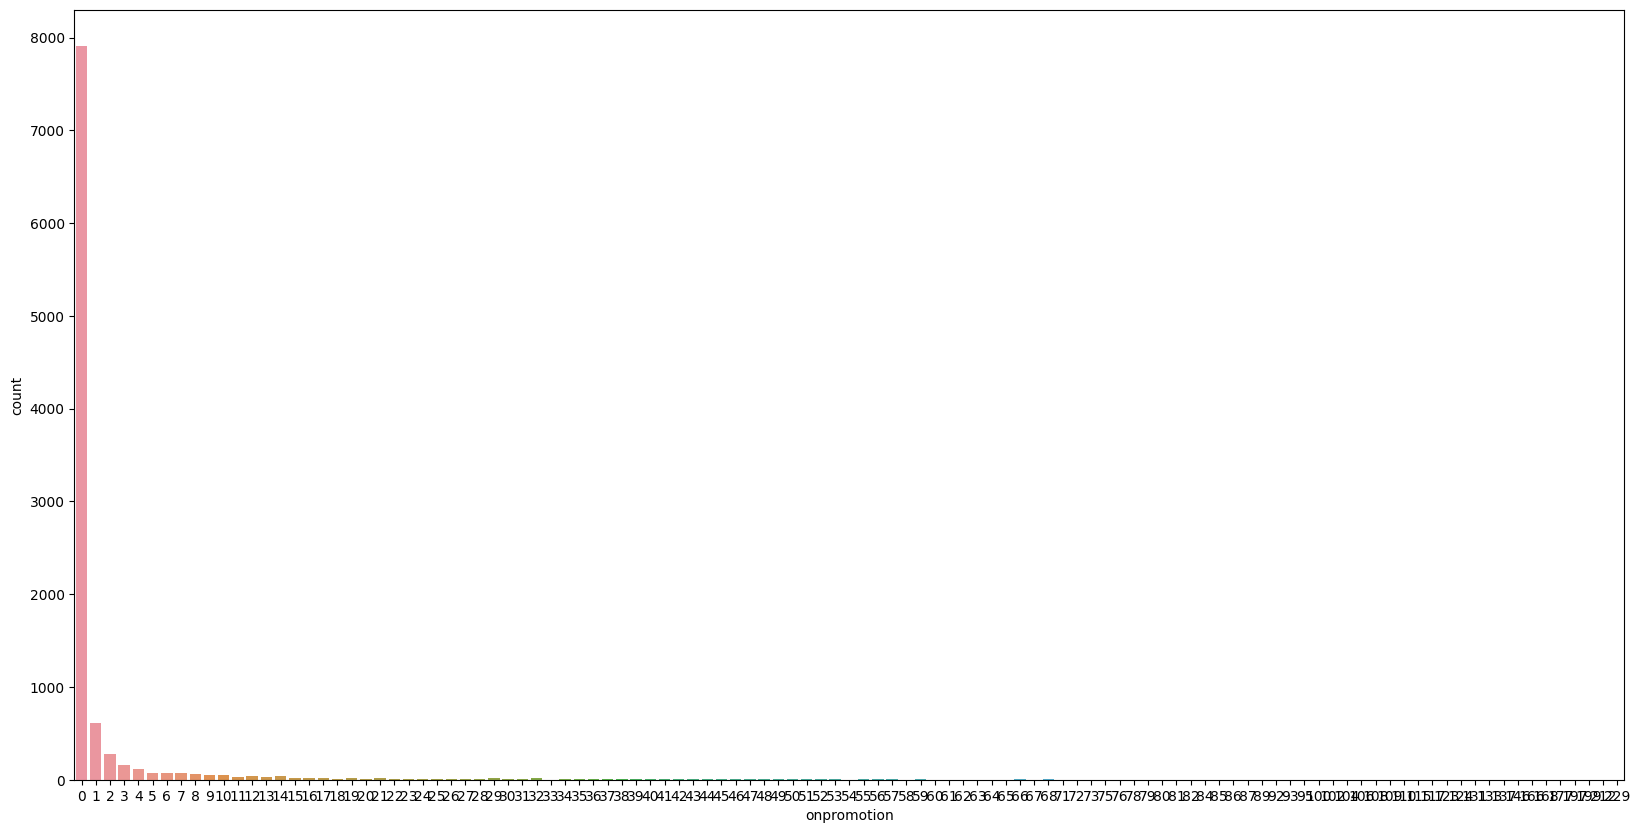

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001B1E1960550> (for post_execute):


KeyboardInterrupt: 

In [23]:
## iterate a for loop to create count plots for each feature, x axis is date
for col in ['date', 'family', 'transferred', 'onpromotion', 'transactions', 'sales', 'dcoilwtico', 'city', 'state', 'type_store', 'cluster']:
    plt.figure(figsize=(20,10))
    sns.countplot(x=col, data=train.sample(10000))
    plt.show()

In [15]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'type_holiday', 'locale', 'locale_name', 'description', 'transferred',
       'dcoilwtico', 'city', 'state', 'type_store', 'cluster', 'transactions'],
      dtype='object')

C:\Users\Juan\AppData\Local\Temp\ipykernel_9220\2077812953.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train[['date', 'store_nbr', 'family', 'transferred', 'onpromotion', 'transactions', 'sales', 'dcoilwtico', 'city', 'state', 'type_store', 'cluster']].corr()


<Axes: >

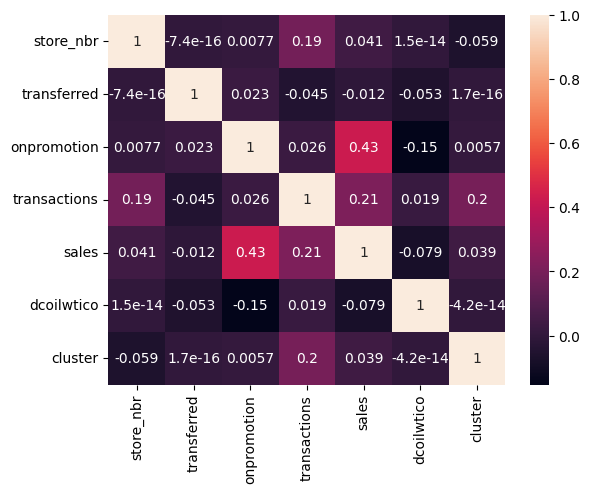

In [14]:
# create correlation heatmap of features including correlation numerical value
corr = train[['date', 'store_nbr', 'family', 'transferred', 'onpromotion', 'transactions', 'sales', 'dcoilwtico', 'city', 'state', 'type_store', 'cluster']].corr()
sns.heatmap(corr, annot=True)

### correlation conclusions

According the correlation heatmap there doesnt seem to be major correlation issues. The highest correlation seems to be between "sales" and "onpromotion". Which makes sense that a cheaper item would be sold more.


In [ ]:
# Load the dataset
## read all files in directory
for file in os.listdir('./data'):
    if file.endswith('.csv'):
        print(file)
        df = pd.read_csv(os.path.join('./data', file))
        print(df.head())
        print(df.dtypes)
        print(df.describe(include='all'))


df = pd.read_csv('./data/breast_cancer_data.csv')

# Print datatypes
print(df.dtypes)

# Describe columns
df.describe(include='all')